In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import implementPairDecayLimit, readHEPDataCsv
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions

import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `hSM > a a > mumu bb`  [2110.00313](https://arxiv.org/abs/2110.00313)
Explicit CP assumption in the BDT limit.

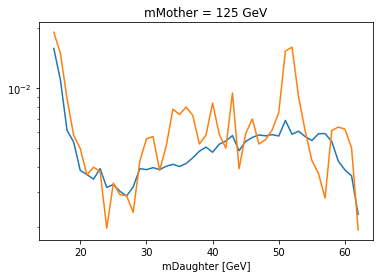

Looks good. Saving this to comb_aa_LHC13_ATLAS_139.json


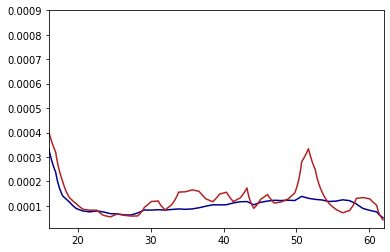

In [8]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1937344/Table%204/1/csv"
)
df = dfs[0].rename(
    columns={"$m_a$ [GEV]": "mDaughter1", "OBSERVED LIMIT (WITH BDT)": "obs"}
)
df["exp"] = dfs[1]["EXPECTED LIMIT (WITH BDT)"]

df["mMother"] = 125
prodModes = ["H", "vbfH", "HZ", "HW"]
ref = HP.SMHiggs(125)
refCxn = np.sum([ref.cxn("LHC13", p) for p in prodModes])
df.obs *= refCxn
df.exp *= refCxn
limitFile = implementPairDecayLimit(
    "2110.00313",
    {
        "production": prodModes,
        "firstDecay": ["mumu"],
        "secondDecay": ["bb"],
    },
    "https://doi.org/10.17182/hepdata.107761.v1/t4",
    df,
    massResolution={
        "firstDaughter": {"absolute": 0.08, "relative": 0.019},  # given on page 5
        "secondDaughter": resolution.bb["medMass"],
        "mother": {
            "absolute": 20,  # 110-140 signal region
            "relative": 0,
        },
    },
    constraints={
        "mother": [
            {
                "modelLike": "SMHiggs",
                "process": {"channels": [[x, "none"] for x in prodModes]},
            }
        ],
        "firstDaughter": [{"CPValue": "odd"}],
        "secondDaughter": [{"CPValue": "odd"}],
    },
    prefix="comb_aa",
    idSuffix=2,
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setMass(125)
h1 = pred.addParticle(HP.NeutralScalar("h1", cp="odd"))
h1.setDecayWidth("bb", 1.0)
h2 = pred.addParticle(HP.NeutralScalar("h2", cp="odd"))
h2.setDecayWidth("mumu", 1.0)
hm = np.linspace(16, 62)
r = np.linspace(1e-5, 9e-4)


def testAgainstLimit(mass, rate):
    HP.effectiveCouplingInput(hh, HP.scaledSMlikeEffCouplings(np.sqrt(rate)))
    hh.setTotalWidth(0)
    hh.setDecayWidth("h1", "h2", 1.0)
    h1.setMass(mass)
    h2.setMass(mass)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


## `hSM > h h > mumu bb`  [2110.00313](https://arxiv.org/abs/2110.00313)


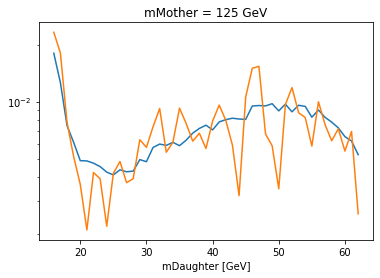

Looks good. Saving this to comb_LHC13_ATLAS_139.json


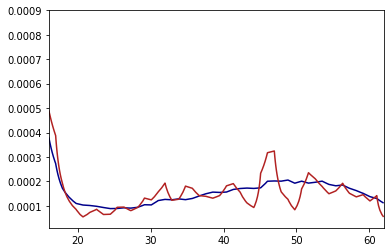

In [9]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1937344/Table%205/1/csv"
)
df = dfs[0].rename(
    columns={"$m_a$ [GEV]": "mDaughter1", "OBSERVED LIMIT (WITHOUT BDT)": "obs"}
)
df["exp"] = dfs[1]["EXPECTED LIMIT (WITHOUT BDT)"]

df["mMother"] = 125
prodModes = ["H", "vbfH", "HZ", "HW"]
ref = HP.SMHiggs(125)
refCxn = np.sum([ref.cxn("LHC13", p) for p in prodModes])
df.obs *= refCxn
df.exp *= refCxn
limitFile = implementPairDecayLimit(
    "2110.00313",
    {
        "production": prodModes,
        "firstDecay": ["mumu"],
        "secondDecay": ["bb"],
    },
    "https://doi.org/10.17182/hepdata.107761.v1/t5",
    df,
    massResolution={
        "firstDaughter": {"absolute": 0.08, "relative": 0.019},  # given on page 5
        "secondDaughter": resolution.bb["medMass"],
        "mother": {
            "absolute": 20,  # 110-140 signal region
            "relative": 0,
        },
    },
    constraints={
        "mother": [
            {
                "modelLike": "SMHiggs",
                "process": {"channels": [[x, "none"] for x in prodModes]},
            }
        ],
    },
    idSuffix=1,
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setMass(125)
h1 = pred.addParticle(HP.NeutralScalar("h1"))
h1.setDecayWidth("bb", 1.0)
h2 = pred.addParticle(HP.NeutralScalar("h2"))
h2.setDecayWidth("mumu", 1.0)
hm = np.linspace(16, 62)
r = np.linspace(1e-5, 9e-4)


def testAgainstLimit(mass, rate):
    HP.effectiveCouplingInput(hh, HP.scaledSMlikeEffCouplings(np.sqrt(rate)))
    hh.setTotalWidth(0)
    hh.setDecayWidth("h1", "h2", 1.0)
    h1.setMass(mass)
    h2.setMass(mass)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()
